<a href="https://colab.research.google.com/github/thiyagarajan2002/Crypto_price_prediction/blob/main/Crypto_price_prediction_drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('dataset.csv')
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075


In [ ]:
projection=14
df['prediction']=df[['Close']].shift(-projection)
df.head(20)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,prediction
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,157.69
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,159.05
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279,158.77
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131,159.84
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622,160.21
5,1586977200000,2020-04-15 19:00:00,ETHUSD,157.78,157.84,157.10,157.10,329.356201,160.91
6,1586973600000,2020-04-15 18:00:00,ETHUSD,157.48,158.20,157.48,157.78,520.137463,159.97
7,1586970000000,2020-04-15 17:00:00,ETHUSD,157.12,157.78,156.90,157.48,156.552221,160.62
8,1586966400000,2020-04-15 16:00:00,ETHUSD,155.81,157.52,155.74,157.12,430.083035,160.27
9,1586962800000,2020-04-15 15:00:00,ETHUSD,157.12,157.15,155.81,155.81,303.839541,158.50


In [ ]:
df.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,prediction
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213,NaN
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450,NaN
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567,NaN
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075,NaN
34496,1462798800,2016-05-09 13:00:00,ETHUSD,0.00,12.00,0.00,9.55,432.562115,NaN


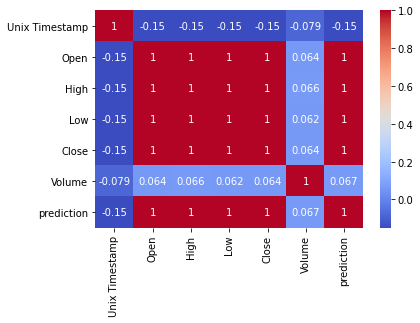

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
x=np.array(df[['Close']])
x=x[:-projection]
print(x)

[[150.39]
 [152.94]
 [155.81]
 ...
 [  9.36]
 [  9.36]
 [  9.36]]


In [ ]:
y=df['prediction'].values
y=y[:-projection]
print(y)

[157.69 159.05 158.77 ...   9.99  10.     9.55]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

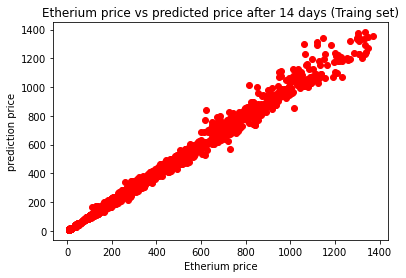

In [ ]:
plt.scatter(x_test,y_test,color="red")
plt.title("Etherium Price vs Predicted Price after 14 days (Traing set)")
plt.xlabel("Etherium Price")
plt.ylabel("prediction Price")
plt.show()

In [ ]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linreg_confidense=linreg.score(x_test,y_test)
print("Linear regression confidence:",linreg_confidense)

Linear regression confidence: 0.9949101679548629


In [ ]:
linreg_prediction=linreg.predict(x_test)
print(linreg_prediction)

[139.57839096  88.15703316 264.52151944 ...  89.91230061 123.03300062
 193.91189702]


In [ ]:
y_test

array([139.26,  88.03, 260.04, ...,  86.97, 126.43, 187.55])

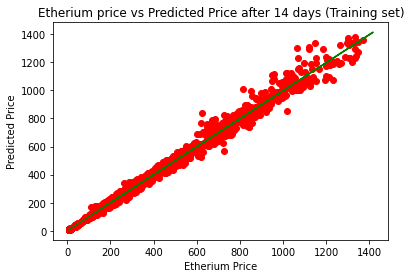

In [ ]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, linreg.predict(x_train), color = "green")
plt.title("Etherium price vs Predicted Price after 14 days (Training set)")
plt.xlabel("Etherium Price")
plt.ylabel("Predicted Price")
plt.show()

In [ ]:
import pickle
filename='dataset.csv'
pickle.dump(linreg,open(filename,'wb'))

In [ ]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_test,y_test)
print(result)

0.9949101679548629


In [ ]:
load_model.predict(x_test)

array([139.57839096,  88.15703316, 264.52151944, ...,  89.91230061,
       123.03300062, 193.91189702])